currently doing aug 2019 images - 16 found, plotting all to look at them

In [56]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import geopandas as gpd

files = sorted(glob.glob("*.nc"))
files

In [ ]:
#format is 'fn = '/mnt/c/Users/isabe/FILES/Documents/FHL Summer 2025/landsat .nc files/2022-09-29T19_01_47.715049000.nc''
fn = '/mnt/c/Users/isabe/FILES/Documents/FHL Summer 2025/landsat .nc files/2022-09-29T19_01_47.715049000.nc'

print('6.26 :0')



# fn2 = '2019-08-04T18:49:04.922660000.nc' #good
# fn6 = '2019-08-12T19:01:33.400679000.nc' #
# fn10 = '2019-08-20T18:48:24.858943000.nc'
# fn14 = '2019-08-28T19:01:37.429983000.nc'









fn1 = '2020-07-05T18:31:52.785482000.nc'
fn2 = '2020-07-13T19:01:17.887145000.nc'
fn3 = '2020-07-21T18:30:54.112057000.nc'
fn4 = '2020-07-29T19:01:22.439132000.nc'
fn5 = '2020-08-06T18:29:54.122643000.nc'
fn6 = '2020-08-14T19:01:26.426532000.nc'
fn7 = '2020-08-22T18:28:52.743266000.nc'
fn8 = '2020-08-30T19:01:34.768005000.nc'
fn9 = '2020-09-07T18:27:50.030860000.nc'
fn10 = '2020-09-15T19:01:40.966120000.nc'
fn11 = '2020-09-23T18:26:46.234346000.nc'
fn12 = '2020-10-01T19:01:44.969542000.nc'
# fn13 = '2023-09-04T19:01:25.437238000.nc'
# fn14 = '2023-09-11T19:01:25.437238000.nc'
# fn15 =
# fn16 =
# fn17 =
# fn18 =
# fn19 =
# fn20 =


In [58]:
#filesnames = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11, fn12, fn13, fn14, fn15, fn16]
filenames = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11, fn12]
             #, fn6, fn7, fn8, fn9]
datasets = [xr.open_dataset(fn) for fn in filenames]
ds1 = xr.open_dataset(fn1)
ds2 = xr.open_dataset(fn2)
ds3 = xr.open_dataset(fn3)
ds4 = xr.open_dataset(fn4)
ds5 = xr.open_dataset(fn5)
ds6 = xr.open_dataset(fn6)
ds7 = xr.open_dataset(fn7)
ds8 = xr.open_dataset(fn8)
ds9 = xr.open_dataset(fn9)
ds10= xr.open_dataset(fn10)
ds11= xr.open_dataset(fn11)
ds12= xr.open_dataset(fn12)
# # ds13= xr.open_dataset(fn13)
# ds14= xr.open_dataset(fn14)
# # ds15= xr.open_dataset(fn15)
# # ds16= xr.open_dataset(fn16)

ds

In [59]:
#1 plot

#dss = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10, ds11, ds12, ds13, ds14, ds15, ds16]
dss = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10, ds11, ds12]
       
     


(48.465113, -122.952554)

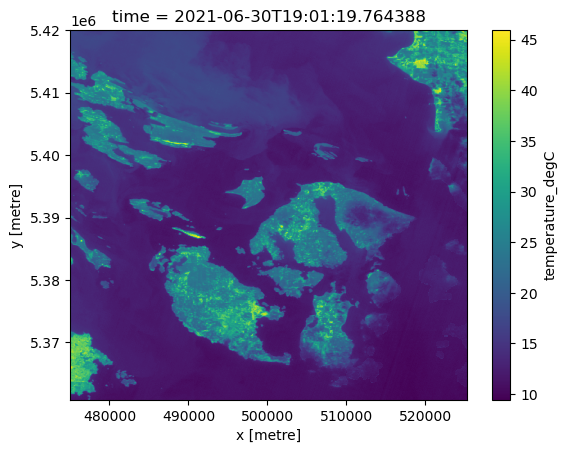

In [51]:
ds1['temperature_degC'].plot()

48.465113, -122.952554


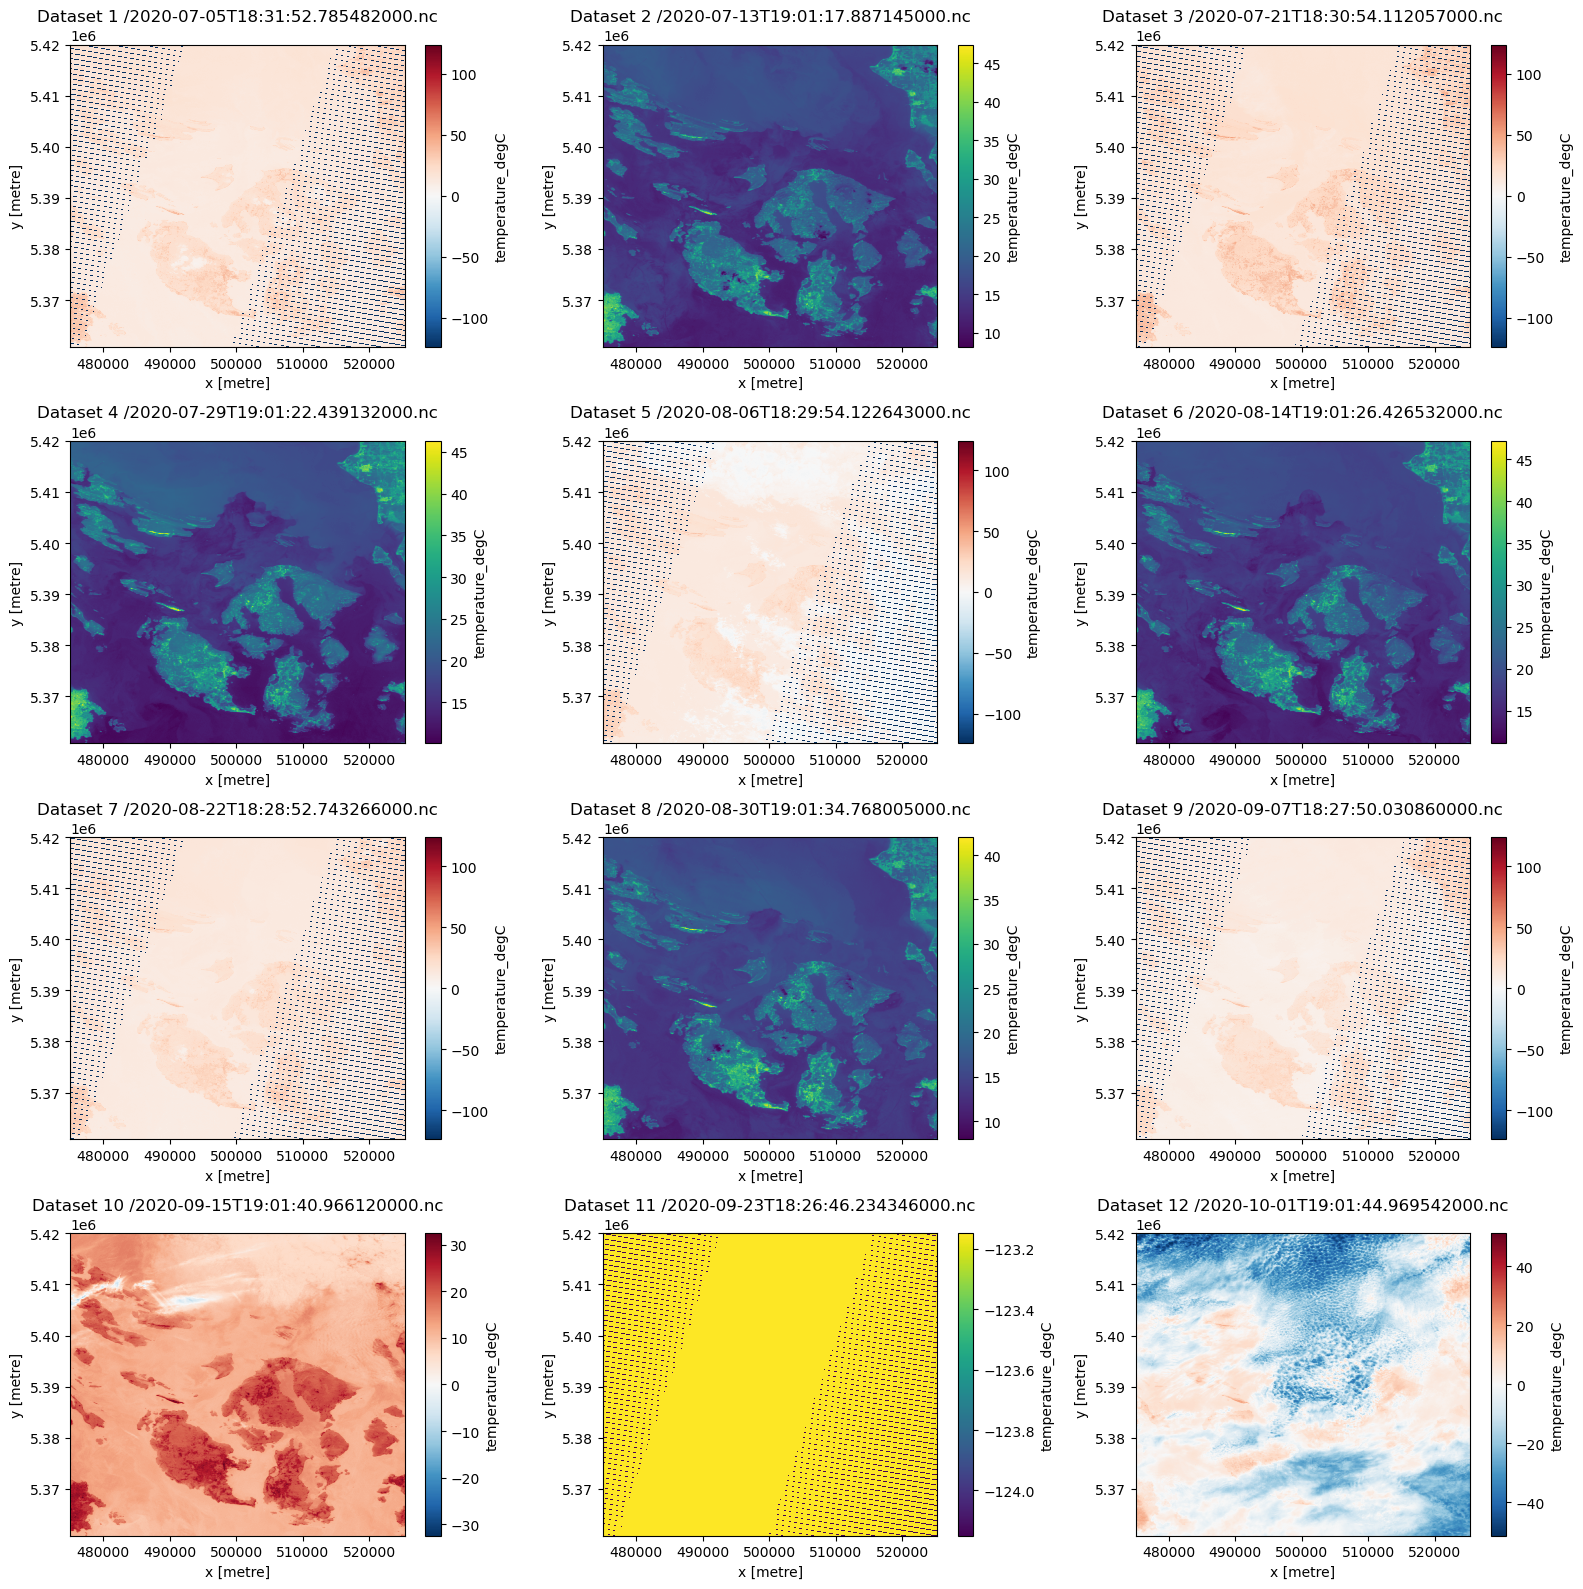

In [60]:
#all plots

fig, axes = plt.subplots(4, 3, figsize=(16, 16))  #edit args to fit # of plots needed
axes = axes.flatten() 


for i, d in enumerate(dss):
    d['temperature_degC'].plot(ax=axes[i])  # Specify subplot
    axes[i].set_title(f"Dataset {i+1} " + d.encoding['source'][31:])     # Optional title

plt.tight_layout()
plt.show()

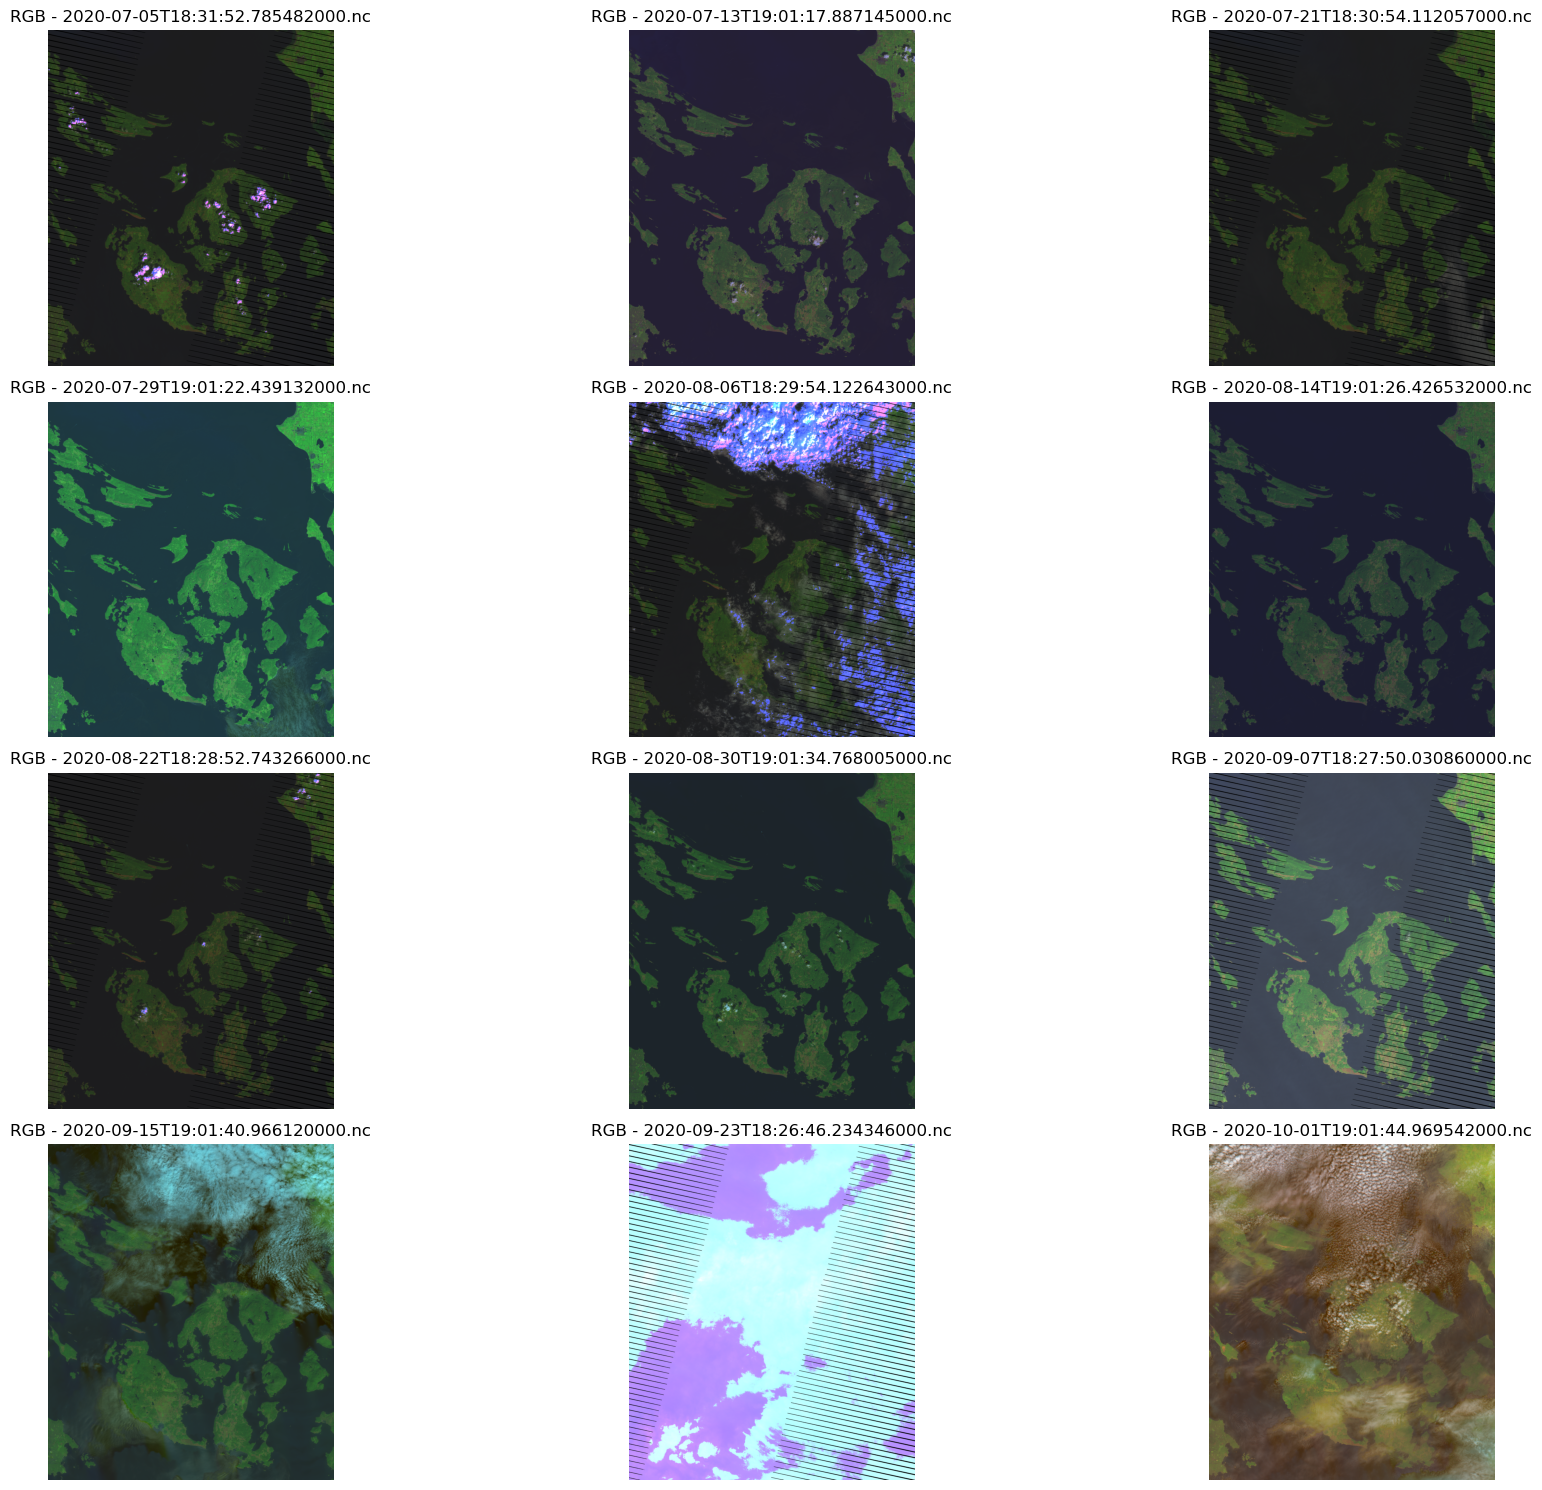

In [61]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten()

for i, ds in enumerate(dss):
    # Normalize each band
    swir16_norm = ds['swir16'] / np.max(ds['swir16'])
    nir08_norm = ds['nir08'] / np.max(ds['nir08'])
    blue_norm = ds['blue'] / np.max(ds['blue'])
    
    # Stack into RGB
    rgb_image = np.stack([
        swir16_norm.values,
        nir08_norm.values,
        blue_norm.values
    ], axis=-1)
    
    # Plot
    axes[i].imshow(rgb_image)
    axes[i].axis('off')
    
    # Title from source path if available
    source = ds.encoding.get('source', f"Image {i+1}")
    axes[i].set_title("RGB - " + source[-32:])  # Adjust slicing as needed

plt.tight_layout()
plt.show()

In [1]:
#this code converts from latlong
#got this point from google maps off of CP, had to convert from latlong (WGS84) (world geodetic system 1984) into UTM 10-N
#important to note: latlong is EPSG:4326, UTM is EPSG:32610
#UTM 10N is specifically western washington + a little more
from shapely.geometry import Point
#Point has functions like buffer, etc, which we used to make circle
#shapely is vector data
import geopandas as gpd 

# Define the lat/lon point
lat_lon_point = Point(-122.952554, 48.465113)

# Create a GeoDataFrame with the point and its original CRS (EPSG:4326)
gdf = gpd.GeoDataFrame(geometry=[lat_lon_point], crs="EPSG:4326")
#geopandas is able to convert btwn coords pretty easily, so made a GeoDataFrame for that reason only - csv with 1 item in it, essentially

# Reproject the GeoDataFrame to the target CRS (EPSG:32610)
gdf_reprojected = gdf.to_crs("EPSG:32610")
#coordinate reference system

# Extract the reprojected point
reprojected_point = gdf_reprojected.geometry[0]
print(reprojected_point)

/home/caprice/micromamba/envs/summerfog/lib/python3.12/site-packages/numpy/_core/getlimits.py:552: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


POINT (503507.328175198 5367998.7916395)


In [2]:
reprojected_point.x

503507.328175198

In [4]:
#extracting data from a single point
#
ds6.interp(x=reprojected_point.x, y=reprojected_point.y, method='nearest') #nearest vs linear = method used to get values at point from gridded data set

NameError: name 'ds6' is not defined

In [ ]:
ds

<xarray.Dataset> Size: 78MB
Dimensions:              (y: 2335, x: 1678)
Coordinates:
  * y                    (y) float64 19kB 5.42e+06 5.42e+06 ... 5.35e+06
  * x                    (x) float64 13kB 4.75e+05 4.75e+05 ... 5.253e+05
    time                 datetime64[ns] 8B ...
Data variables:
    spatial_ref          int32 4B ...
    nir08                (y, x) uint16 8MB ...
    red                  (y, x) uint16 8MB ...
    green                (y, x) uint16 8MB ...
    blue                 (y, x) uint16 8MB ...
    qa_pixel             (y, x) uint16 8MB ...
    lwir11               (y, x) uint16 8MB ...
    temperature_celsius  (y, x) float64 31MB ...

<Axes: title={'center': 'time = 2022-09-29T19:01:47.715049'}, xlabel='x [metre]', ylabel='y [metre]'>

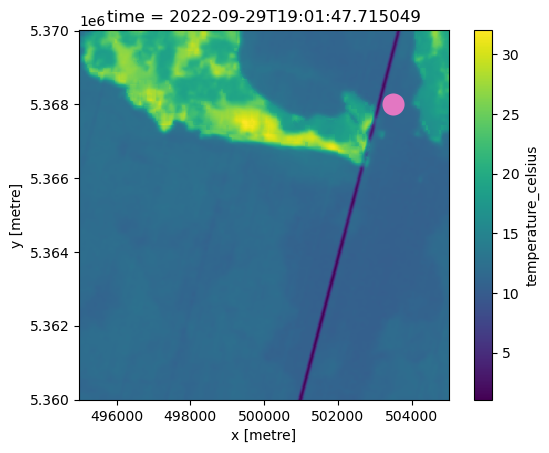

In [ ]:
#extracting data for an area
#using a buffer function 
#.buffer() makes a polygon
#again, using GeoDataFrame as a convenient way to do things - table w/ one item in it
gdf = gpd.GeoDataFrame(
    geometry=[reprojected_point.buffer(300)], 
    crs="EPSG:32610"
)


fig, ax = plt.subplots()
ds['temperature_celsius'].loc[5.37e6:5.36e6, 4.95e5:5.05e5].plot(ax = ax)
#plt.ylim(5.36e6, 5.37e6)

gdf.plot(ax = ax, color='tab:pink')
#using gdf to plot

In [ ]:
ds

<xarray.Dataset> Size: 78MB
Dimensions:              (y: 2335, x: 1678)
Coordinates:
  * y                    (y) float64 19kB 5.42e+06 5.42e+06 ... 5.35e+06
  * x                    (x) float64 13kB 4.75e+05 4.75e+05 ... 5.253e+05
    time                 datetime64[ns] 8B ...
    spatial_ref          int64 8B 0
Data variables:
    nir08                (y, x) uint16 8MB ...
    red                  (y, x) uint16 8MB ...
    green                (y, x) uint16 8MB ...
    blue                 (y, x) uint16 8MB ...
    qa_pixel             (y, x) uint16 8MB ...
    lwir11               (y, x) uint16 8MB ...
    temperature_celsius  (y, x) float64 31MB ...

In [ ]:
ds = ds.rio.write_crs('EPSG:32610')
#in order to use rio.clip, needed to make sure that ds had "i am in UTM coords" written in the right place
#so write_crs does that for us


In [ ]:
dsclipped = ds.rio.clip(gdf.geometry, all_touched=True)
#clipping all data to just the circle and getting what's inside
#getting rid of all_touched=True makes it default False

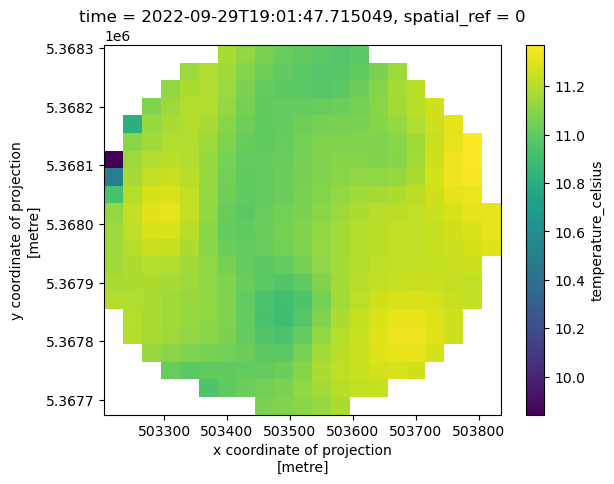

In [ ]:
dsclipped['temperature_celsius'].plot()
#plotting!

In [ ]:
#dsclipped.temperature_celsius.mean(dim=["x", "y"])
dsclipped.mean(dim=["x", "y"])

<xarray.Dataset> Size: 72B
Dimensions:              ()
Coordinates:
    time                 datetime64[ns] 8B ...
    spatial_ref          int64 8B 0
Data variables:
    nir08                float64 8B 5.672e+03
    red                  float64 8B 5.684e+03
    green                float64 8B 6.066e+03
    blue                 float64 8B 5.957e+03
    qa_pixel             float64 8B 1.747e+04
    lwir11               float64 8B 3.15e+04
    temperature_celsius  float64 8B 11.13

In [ ]:
dsclipped

<xarray.Dataset> Size: 960B
Dimensions:              (y: 7, x: 6)
Coordinates:
  * y                    (y) float64 56B 5.368e+06 5.368e+06 ... 5.368e+06
  * x                    (x) float64 48B 5.034e+05 5.035e+05 ... 5.036e+05
    time                 datetime64[ns] 8B ...
    spatial_ref          int64 8B 0
Data variables:
    nir08                (y, x) uint16 84B 0 7130 7138 7143 7135 ... 0 7134 0 0
    red                  (y, x) uint16 84B 0 7130 7149 7148 7139 ... 0 7143 0 0
    green                (y, x) uint16 84B 0 7648 7650 7632 7625 ... 0 7625 0 0
    blue                 (y, x) uint16 84B 0 7500 7513 7517 7510 ... 0 7494 0 0
    qa_pixel             (y, x) uint16 84B 1 21952 21952 21952 ... 1 21952 1 1
    lwir11               (y, x) uint16 84B 0 39541 39549 39556 ... 0 39539 0 0
    temperature_celsius  (y, x) float64 336B nan 11.0 11.03 ... 11.0 nan nan